# Aplicação de Modelos de Markov e Redes Neurais LSTM na Previsão de Arrecadação do ICMS Paulista
## Resultados dos Experimentos Univariados e Univariados com Regressão Múltipla para as Previsões Anuais de 2013 a 2022

### Antonio Sergio Ferreira Bonato

Atualmente, na Secretaria da Fazenda e Planejamento do Estado de São Paulo, a previsão de arrecadação do ICMS paulista é feita usando-se um modelo ARIMA com variáveis exógenas, o ARIMAX. Mas o ICMS é não linear e há várias quebras estruturais controladas com diversas *dummies*. A consequência é um modelo bastante sobreajustado, inadequado para previsões de mais longo prazo (mais do que alguns meses, muito menos para um ano). 
A proposta deste trabalho é utilizar modelos não lineares na previsão do ICMS paulista, utilizando redes neurais recorrentes LSTM (*Long Short Term Memory*) e modelos Markov-Switching, fazendo um contraponto entre estes dois modelos. E utilizar, como baseline de comparação, o modelo ARIMAX atual. 

**Palavras-chave**: Markov-Switching Models. Redes Neurais Recorrentes. LSTM. ICMS.

## Gráficos dos Resultados das Previsões

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
seed = 42
random.seed(seed)
np.random.seed(seed)

sns.set()
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(10,7)})

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
df_prev = pd.read_excel("previsoes.xlsx")
df_prev.index = df_prev.date
df_prev.drop('date', axis=1, inplace=True)
df_prev.head()

,real,naive univariado,sarima univariado,sarimax univariado,markov-switching univariado,rnn-lstm univariado,sarimax múltipla,markov-switching múltipla,rnn-lstm múltipla,melhor mape
date,,,,,,,,,,
2013-01-01,8.799359e+09,8.911657e+09,9.283571e+09,9.271713e+09,9.610763e+09,8.770545e+09,9.386985e+09,9.562413e+09,8742386688,9.562413e+09
2013-02-01,8.690433e+09,8.911657e+09,8.985837e+09,8.877335e+09,9.164962e+09,8.771682e+09,8.819138e+09,8.813939e+09,8345878016,8.813939e+09
2013-03-01,8.698445e+09,8.911657e+09,9.368138e+09,9.412618e+09,9.422941e+09,8.773289e+09,9.572178e+09,9.043371e+09,8735536128,9.043371e+09
2013-04-01,9.446984e+09,8.911657e+09,9.678361e+09,9.711009e+09,9.765541e+09,8.778762e+09,1.000040e+10,9.486146e+09,8988795904,9.486146e+09
2013-05-01,9.497989e+09,8.911657e+09,9.612943e+09,9.540179e+09,9.772790e+09,8.787440e+09,9.528873e+09,9.302260e+09,9015341056,9.302260e+09


## Plots dos Valores Mensais Previsões versus Valores Realizados

### Estratégia Naïve vs Real

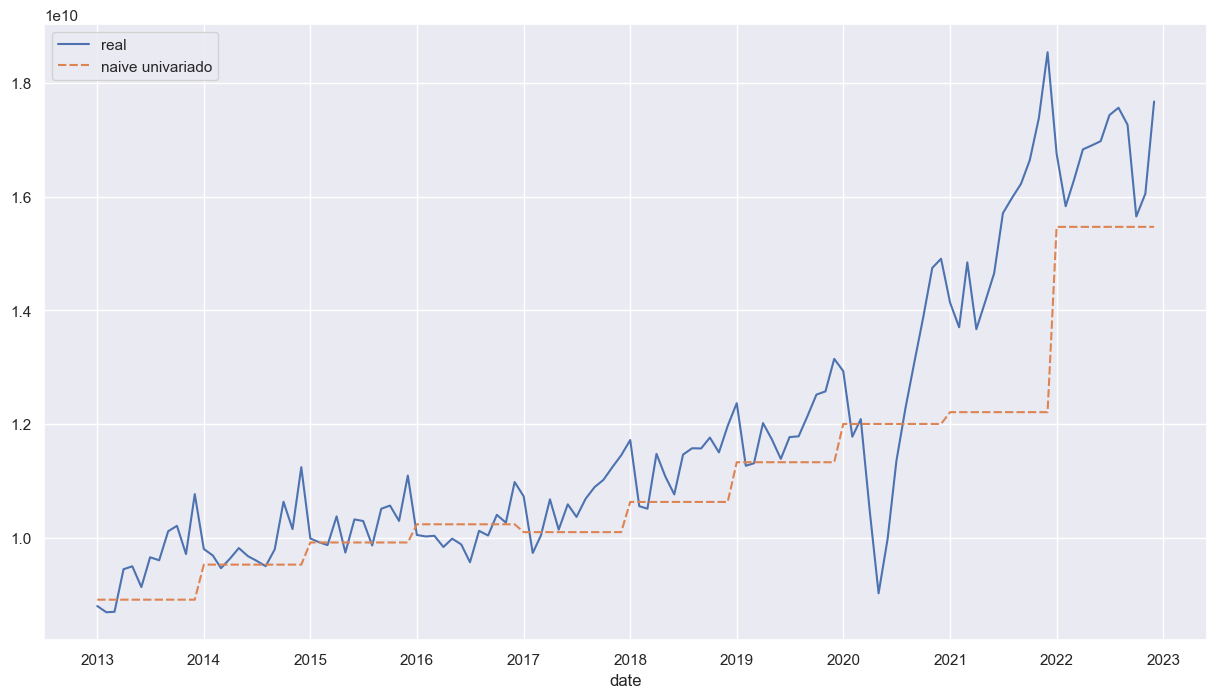

In [4]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'naive univariado']])

### Estratégias SARIMA/SARIMAX vs Real

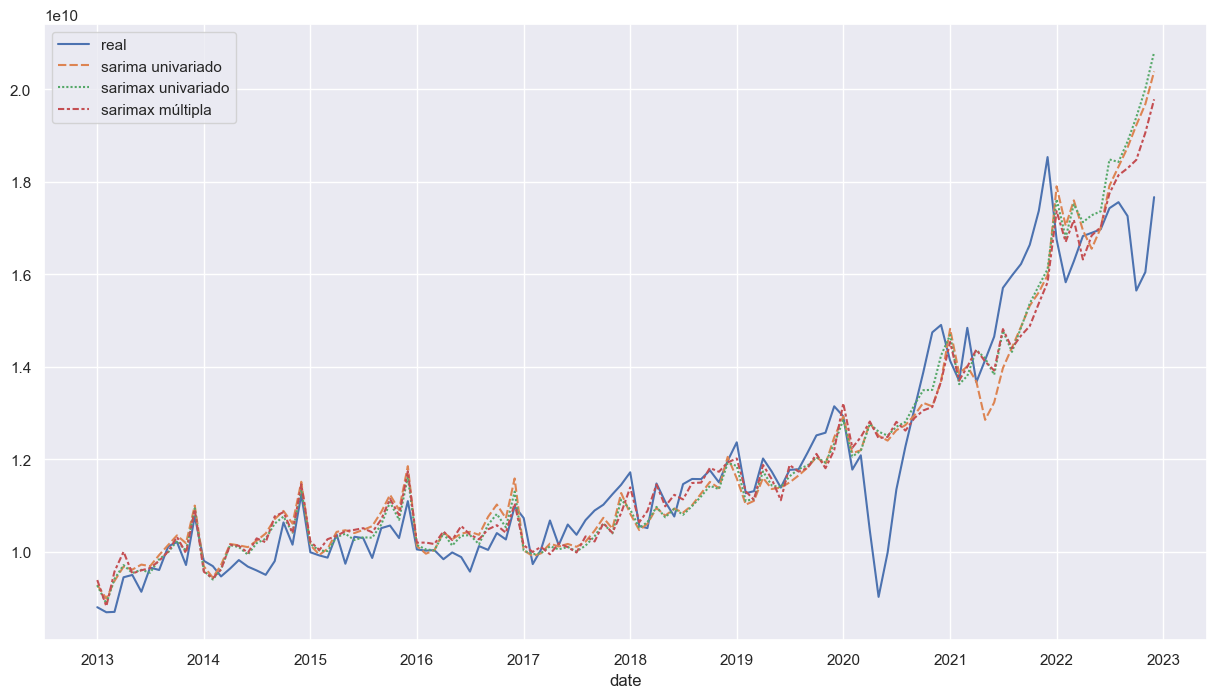

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'sarima univariado',
                                'sarimax univariado', 'sarimax múltipla']])

### Estratégia Markov-Switching vs Real

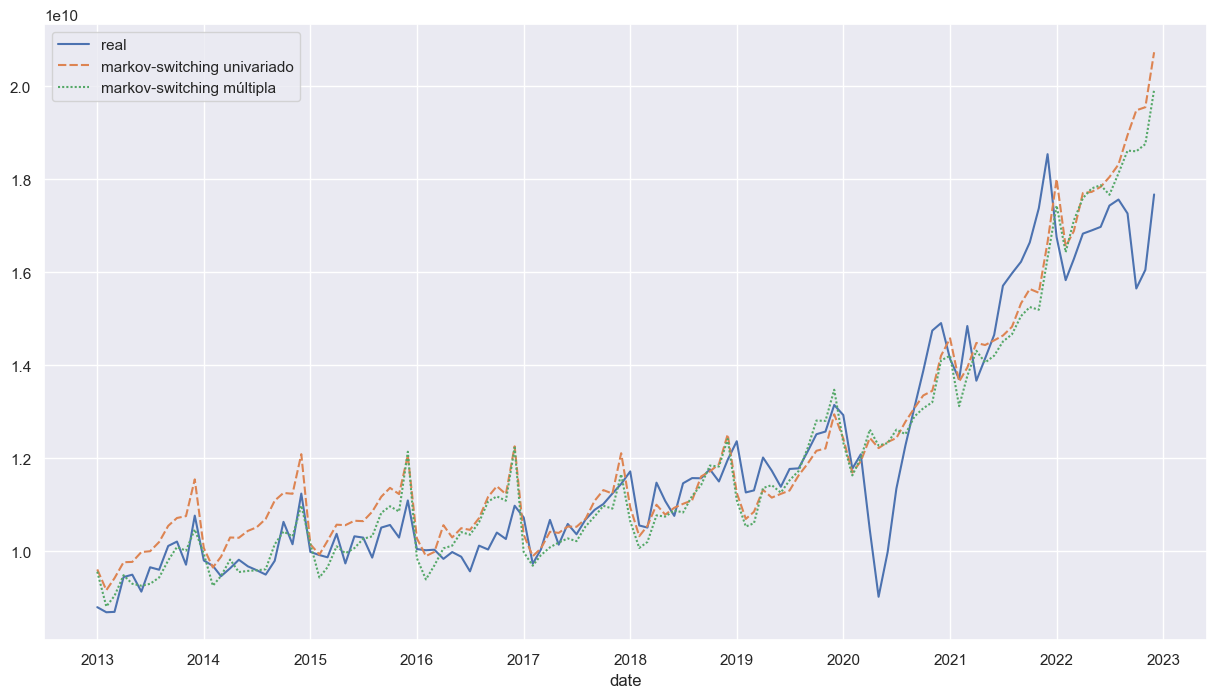

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'markov-switching univariado', 
                                'markov-switching múltipla']])

### Estratégia RNN-LSTM vs Real

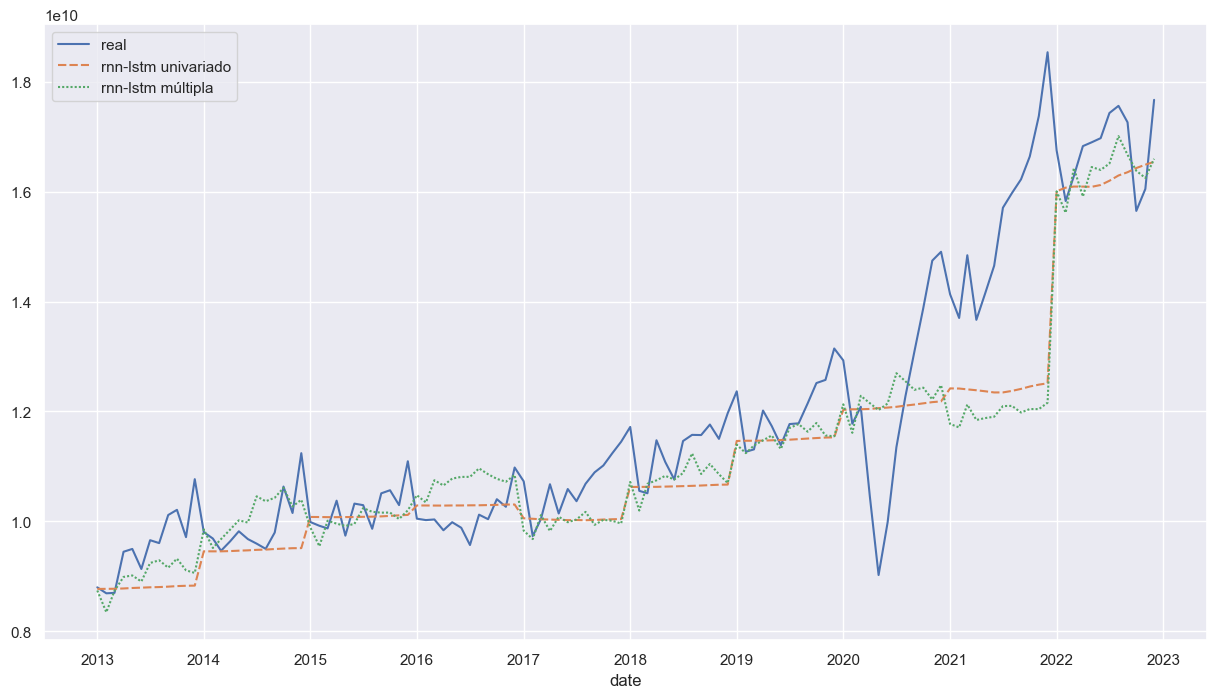

In [7]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'rnn-lstm univariado', 
                                'rnn-lstm múltipla']])

### Estratégia Naïve vs Estratégia RNN-LSTM

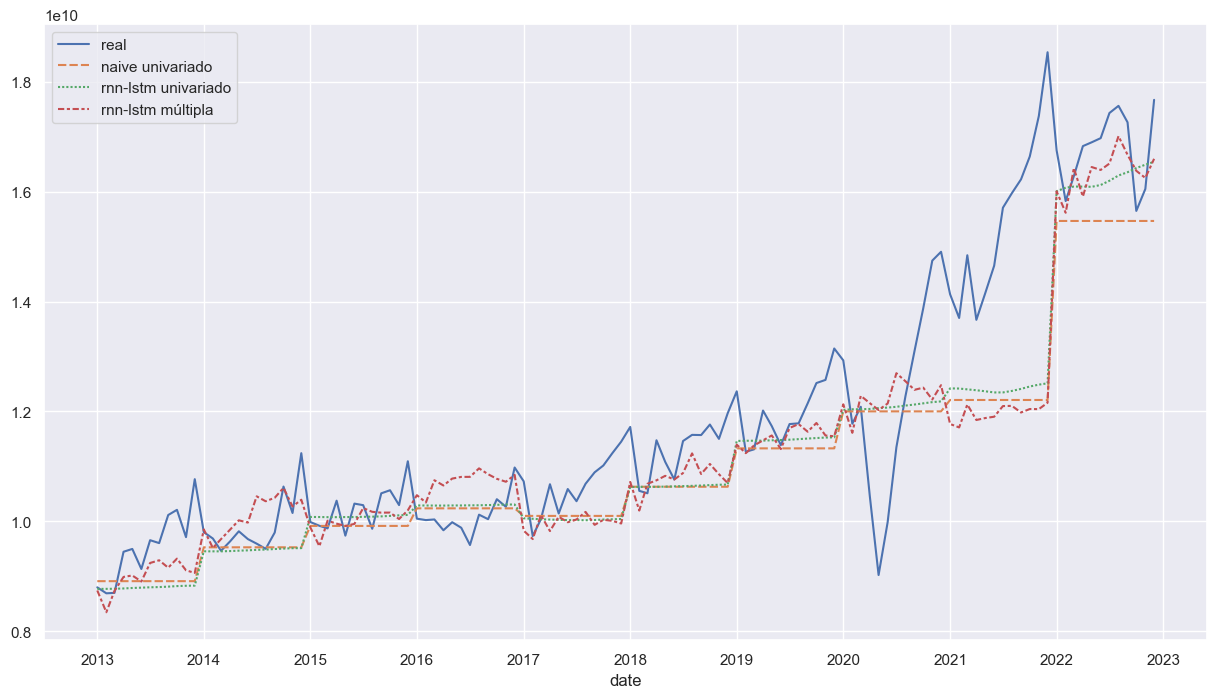

In [28]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'naive univariado', 'rnn-lstm univariado', 
                                'rnn-lstm múltipla']])

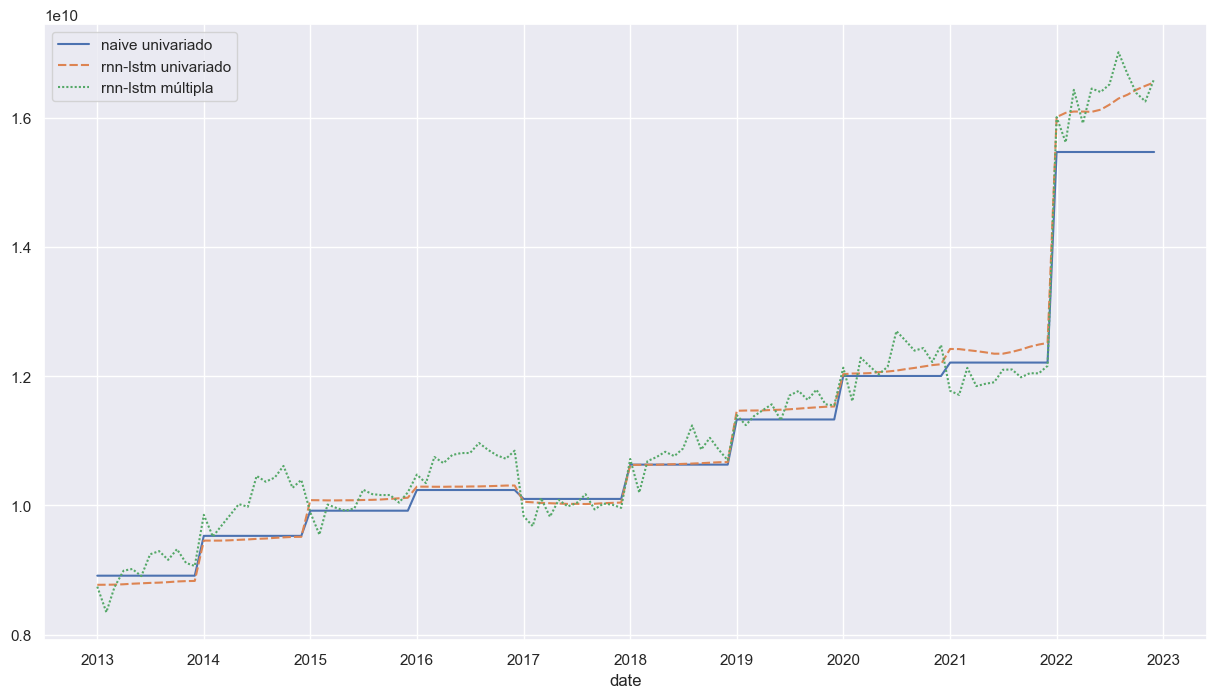

In [29]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['naive univariado', 'rnn-lstm univariado', 
                                'rnn-lstm múltipla']])

### Estratégia Naïve vs Estratégia SARIMAX Univariado
O SARIMAX Univariado foi a estratégia com o maior poder preditivo de acordo com o MCS.

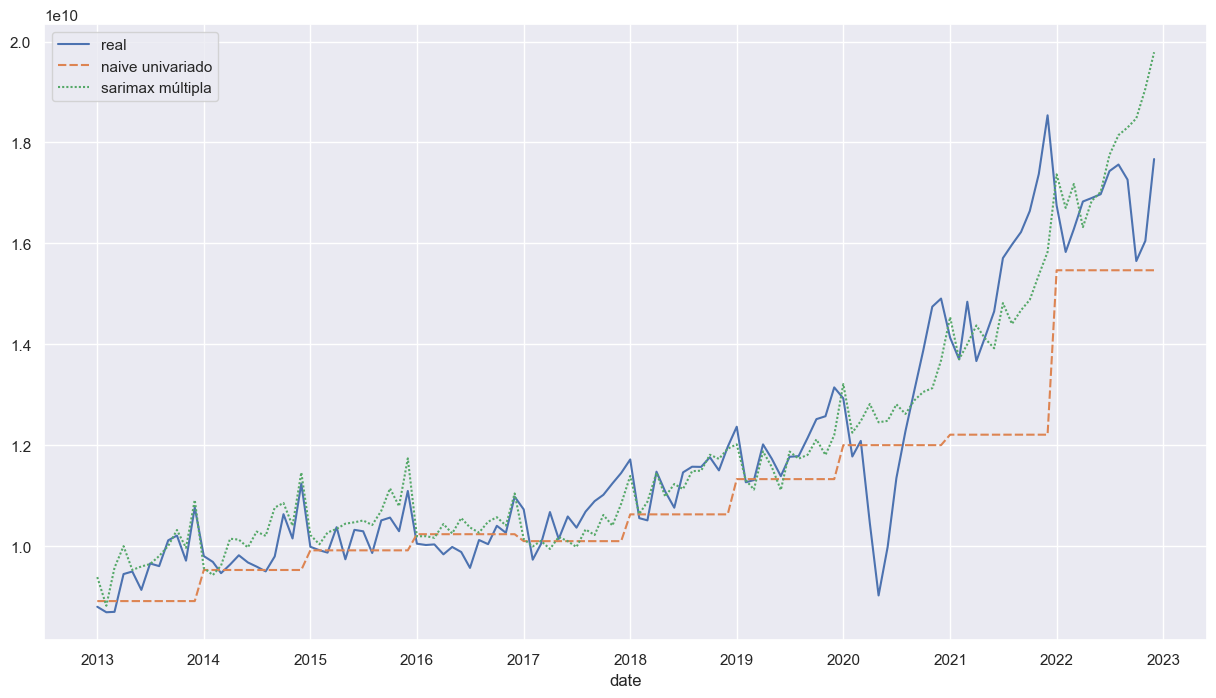

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'naive univariado', 'sarimax múltipla']])

### Estratégias com Melhor MAPE vs Real
Combinação das previsões que obtiveram melhor MAPE fora da amostra.

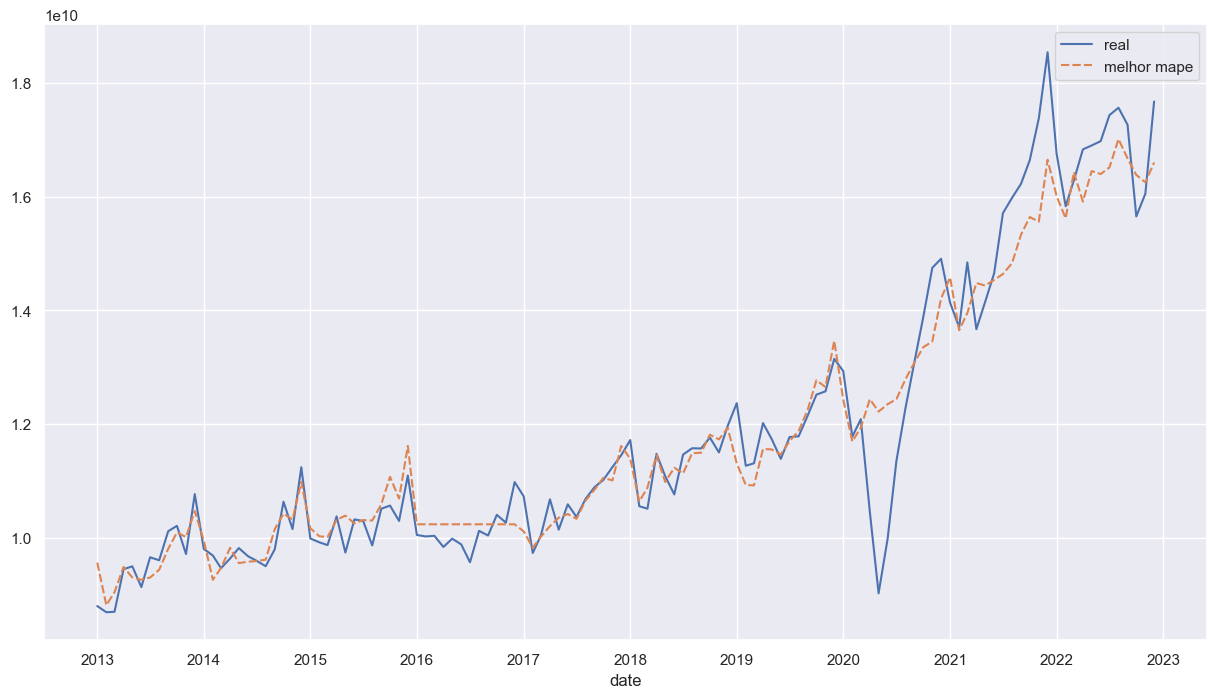

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_prev[['real', 'melhor mape']])

## MAPE dos 10 anos para cada estratégia

In [11]:
icms_ts = pd.Series(df_prev.real)
naive_uni_ts = pd.Series(df_prev['naive univariado'])
sarima_uni_ts = pd.Series(df_prev['sarima univariado'])
sarimax_uni_ts = pd.Series(df_prev['sarimax univariado'])
markov_uni_ts = pd.Series(df_prev['markov-switching univariado'])
rnn_lstm_uni_ts = pd.Series(df_prev['rnn-lstm univariado'])
sarimax_multi_ts = pd.Series(df_prev['sarimax múltipla'])
markov_multi_ts = pd.Series(df_prev['markov-switching múltipla'])
rnn_lstm_multi_ts = pd.Series(df_prev['rnn-lstm múltipla'])
melhor_mape_ts = pd.Series(df_prev['melhor mape'])

In [12]:
mapes = list()

In [13]:
naive_mape = mean_absolute_percentage_error(icms_ts, naive_uni_ts)
mapes.append(naive_mape)
naive_mape

0.07485680791703604

In [14]:
sarima_uni_mape = mean_absolute_percentage_error(icms_ts, sarima_uni_ts)
mapes.append(sarima_uni_mape)
sarima_uni_mape

0.05180554022654126

In [15]:
sarimax_uni_mape = mean_absolute_percentage_error(icms_ts, sarimax_uni_ts)
mapes.append(sarimax_uni_mape)
sarimax_uni_mape

0.04781612593156524

In [16]:
markov_uni_mape = mean_absolute_percentage_error(icms_ts, markov_uni_ts)
mapes.append(markov_uni_mape)
markov_uni_mape

0.058086820175817254

In [17]:
rnn_lstm_uni_mape = mean_absolute_percentage_error(icms_ts, rnn_lstm_uni_ts)
mapes.append(rnn_lstm_uni_mape)
rnn_lstm_uni_mape

0.07050404514417347

In [18]:
sarimax_multi_mape = mean_absolute_percentage_error(icms_ts, sarimax_multi_ts)
mapes.append(sarimax_multi_mape)
sarimax_multi_mape

0.04698628157396281

In [19]:
markov_multi_mape = mean_absolute_percentage_error(icms_ts, markov_multi_ts)
mapes.append(markov_multi_mape)
markov_multi_mape

0.047525589894143

In [20]:
rnn_lstm_multi_mape = mean_absolute_percentage_error(icms_ts, rnn_lstm_multi_ts)
mapes.append(rnn_lstm_multi_mape)
rnn_lstm_multi_mape

0.07120243145087309

In [21]:
melhor_mape_mape = mean_absolute_percentage_error(icms_ts, melhor_mape_ts)
mapes.append(melhor_mape_mape)
melhor_mape_mape

0.03423996490251174

In [22]:
df_mape = pd.DataFrame({'estratégia':list(df_prev.columns[1:]), 'MAPE':mapes})
df_mape.sort_values(by='MAPE', axis=0, inplace=True)
df_mape

,estratégia,MAPE
8,melhor mape,0.034240
5,sarimax múltipla,0.046986
6,markov-switching múltipla,0.047526
2,sarimax univariado,0.047816
1,sarima univariado,0.051806
3,markov-switching univariado,0.058087
4,rnn-lstm univariado,0.070504
7,rnn-lstm múltipla,0.071202
0,naive univariado,0.074857


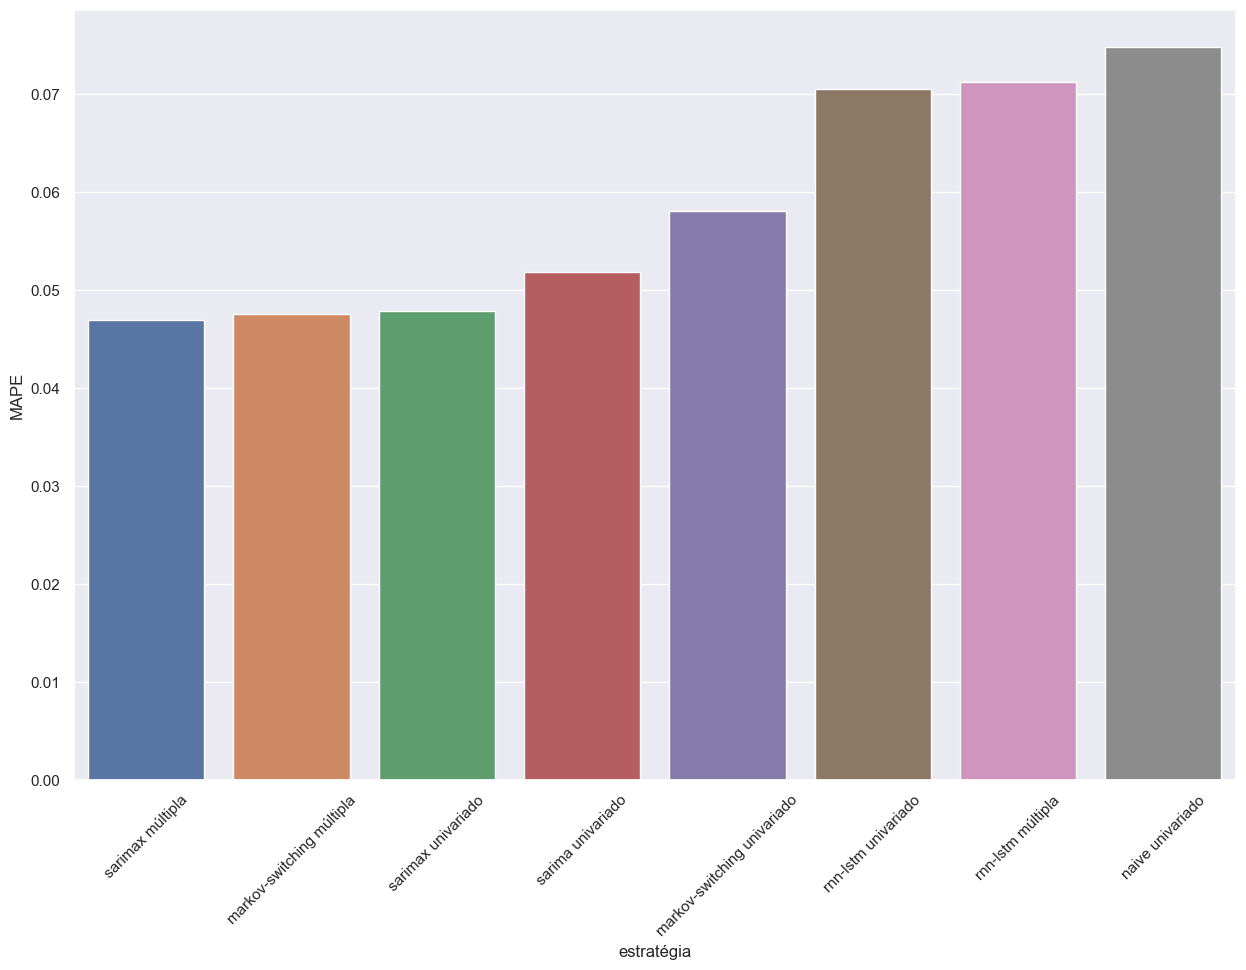

In [23]:
fig = plt.figure(figsize=(15, 10))
df_mape_priori = df_mape[df_mape['estratégia']!='melhor mape']
ax = sns.barplot(x='estratégia', y='MAPE', data=df_mape_priori)
_ = plt.xticks(rotation=45)

In [24]:
print(df_mape_priori.to_latex(escape=False, index=False))

\begin{tabular}{lr}
\toprule
                 estratégia &     MAPE \\
\midrule
           sarimax múltipla & 0.046986 \\
  markov-switching múltipla & 0.047526 \\
         sarimax univariado & 0.047816 \\
          sarima univariado & 0.051806 \\
markov-switching univariado & 0.058087 \\
        rnn-lstm univariado & 0.070504 \\
          rnn-lstm múltipla & 0.071202 \\
           naive univariado & 0.074857 \\
\bottomrule
\end{tabular}



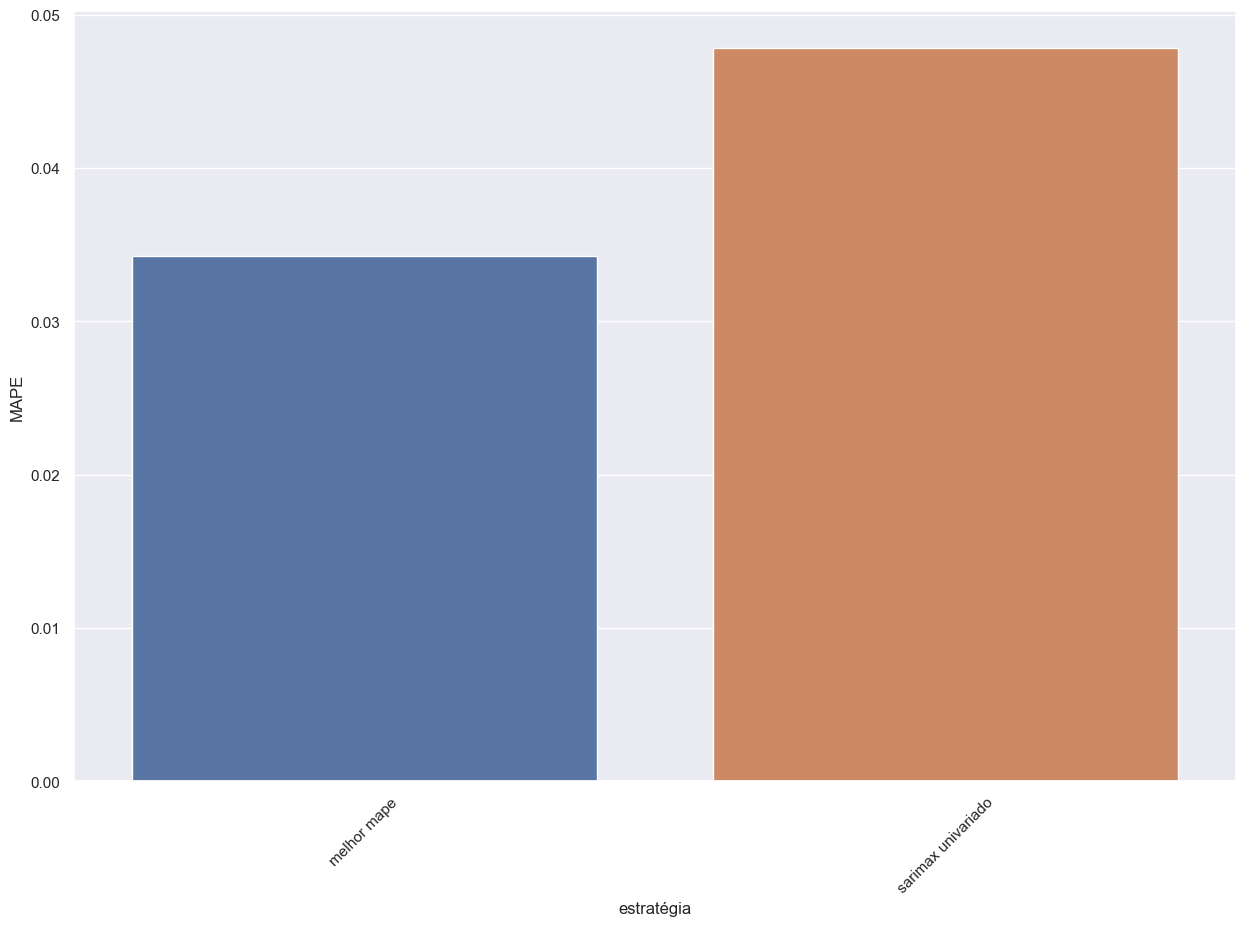

In [25]:
fig = plt.figure(figsize=(15, 10))
df_mape_posteriori = df_mape[df_mape['estratégia'].isin(['melhor mape', 
                                                         'sarimax univariado'])]
ax = sns.barplot(x='estratégia', y='MAPE', data=df_mape_posteriori)
_ = plt.xticks(rotation=45)

In [26]:
print(df_mape_posteriori.to_latex(escape=False, index=False))

\begin{tabular}{lr}
\toprule
        estratégia &     MAPE \\
\midrule
       melhor mape & 0.034240 \\
sarimax univariado & 0.047816 \\
\bottomrule
\end{tabular}

